In [1]:
! pip install -q kaggle

In [2]:
! mkdir ~/.kaggle
! cp kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json
!kaggle datasets download -d ialimustufa/object-detection-for-ppe-covid19-dataset

 97% 119M/123M [00:01<00:00, 114MB/s]
100% 123M/123M [00:01<00:00, 76.9MB/s]


In [ ]:
!unzip object-detection-for-ppe-covid19-dataset.zip

In [38]:
import shutil
import os
paths = ["data/train/images/","data/test/images/","data/train/labels/","data/test/labels/"]
for path in paths:
  if not os.path.exists(path):
    os.makedirs(path)

In [34]:
%cd ..

/content


In [5]:
import glob

images_train_path= []
images_train_path.append(glob.glob(os.path.join("dataset/train", '*.jpg')))

for img in images_train_path[0]: 
  shutil.copyfile(img,"/content/data/train/images/"+img.split("/")[-1])

In [6]:
images_test_path= []
images_test_path.append(glob.glob(os.path.join("dataset/test", '*.jpg')))

for img_test in images_test_path[0]: 
  shutil.copyfile(img_test,"/content/data/test/images/"+img_test.split("/")[-1])

In [7]:
import pandas as pd
train_labels = pd.read_csv("/content/tf_record_files/train_labels.csv")
test_labels = pd.read_csv("/content/tf_record_files/test_labels.csv")

In [8]:
labels_dic = dict()
for i,class_ in enumerate(train_labels["class"].unique()):
  labels_dic[class_] = i

In [37]:
#shutil.rmtree("/content/data/train/labels")

In [39]:
import cv2
prev_img_path = "/content/data/train/images/"
for annotation in train_labels.values:
    if annotation[0].split(".")[-1] == "jpg":
      img_path = "/content/data/train/images/" + annotation[0]
      resize_factor = 640 / max(int(annotation[1]), int(annotation[1]))
      if img_path != prev_img_path:
        img = cv2.imread(img_path)
        img = cv2.resize(img, (int(img.shape[1] * resize_factor), int(img.shape[0] * resize_factor)))
        cv2.imwrite(img_path, img)
        prev_img_path = img_path
    
      x1 = (int(annotation[4]) * resize_factor)
      y1 = (int(annotation[5]) * resize_factor)
      x2 = (int(annotation[6]) * resize_factor)
      y2 = (int(annotation[7]) * resize_factor)
      width = (int(annotation[1]) * resize_factor)
      height = (int(annotation[2]) * resize_factor)
      bbox = f"{int(labels_dic[annotation[3]])} {((x1 + x2) / 2) / width} {((y1 + y2) / 2) / height} {(x2 - x1) / width} {(y2 - y1) / height}"
      label_path = img_path.replace("images", "labels").replace("jpg", "txt")
      with open(label_path, "a") as file:
          file.write(bbox + "\n")

In [62]:
import cv2
prev_img_path = "/content/data/test/images/"
for annotation in test_labels.values:
    if annotation[0].split(".")[-1] == "jpg":
      img_path = "/content/data/test/images/" + annotation[0]
      resize_factor = 640 / max(int(annotation[1]), int(annotation[1]))
      if img_path != prev_img_path:
        img = cv2.imread(img_path)
        img = cv2.resize(img, (int(img.shape[1] * resize_factor), int(img.shape[0] * resize_factor)))
        cv2.imwrite(img_path, img)
        prev_img_path = img_path
    
      x1 = (int(annotation[4]) * resize_factor)
      y1 = (int(annotation[5]) * resize_factor)
      x2 = (int(annotation[6]) * resize_factor)
      y2 = (int(annotation[7]) * resize_factor)
      width = (int(annotation[1]) * resize_factor)
      height = (int(annotation[2]) * resize_factor)
      bbox = f"{int(labels_dic[annotation[3]])} {((x1 + x2) / 2) / width} {((y1 + y2) / 2) / height} {(x2 - x1) / width} {(y2 - y1) / height}"
      label_path = img_path.replace("images", "labels").replace("jpg", "txt")
      with open(label_path, "a") as file:
          file.write(bbox + "\n")

In [28]:
train_labels.head()

,filename,width,height,class,xmin,ymin,xmax,ymax
0,snap07301.jpg,1920,1088,Gloves,769,568,835,680
1,snap07301.jpg,1920,1088,Gloves,988,557,1043,681
2,snap07301.jpg,1920,1088,Mask,870,151,929,226
3,snap07301.jpg,1920,1088,Face_Shield,842,105,951,244
4,snap07301.jpg,1920,1088,Coverall,748,58,1060,954


In [27]:
annotation

array(['How to properly wear personal protective equipment for airborne contaminants 331.jpg',
       1280, 720, 'Gloves', 675, 512, 964, 720], dtype=object)

In [21]:
!git clone https://github.com/ultralytics/yolov5
!pip install -q -U pycocotools
# add -q to quit long outputs
!pip install -q -r yolov5/requirements.txt                 #install dependencies
!cp yolov5/requirements.txt ./

Cloning into 'yolov5'...
remote: Enumerating objects: 15529, done.
remote: Counting objects: 100% (136/136), done.
remote: Compressing objects: 100% (93/93), done.
remote: Total 15529 (delta 49), reused 118 (delta 43), pack-reused 15393
Receiving objects: 100% (15529/15529), 14.59 MiB | 29.35 MiB/s, done.
Resolving deltas: 100% (10573/10573), done.
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 184.3/184.3 kB 6.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 62.7/62.7 kB 8.2 MB/s eta 0:00:00


In [63]:
%cd /content/yolov5/
!python train.py --img 640  --batch 10 --epochs 99 --data /content/yolov5/data/coco128.yaml --weights yolov5s.pt

/content/yolov5
train: weights=yolov5s.pt, cfg=, data=/content/yolov5/data/coco128.yaml, hyp=data/hyps/hyp.scratch-low.yaml, epochs=99, batch_size=10, imgsz=640, rect=False, resume=False, nosave=False, noval=False, noautoanchor=False, noplots=False, evolve=None, bucket=, cache=None, image_weights=False, device=, multi_scale=False, single_cls=False, optimizer=SGD, sync_bn=False, workers=8, project=runs/train, name=exp, exist_ok=False, quad=False, cos_lr=False, label_smoothing=0.0, patience=100, freeze=[0], save_period=-1, seed=0, local_rank=-1, entity=None, upload_dataset=False, bbox_interval=-1, artifact_alias=latest
github: up to date with https://github.com/ultralytics/yolov5 ✅
YOLOv5 🚀 v7.0-145-g94714fe Python-3.9.16 torch-2.0.0+cu118 CUDA:0 (Tesla T4, 15102MiB)

hyperparameters: lr0=0.01, lrf=0.01, momentum=0.937, weight_decay=0.0005, warmup_epochs=3.0, warmup_momentum=0.8, warmup_bias_lr=0.1, box=0.05, cls=0.5, cls_pw=1.0, obj=1.0, obj_pw=1.0, iou_t=0.2, anchor_t=4.0, fl_gamma=0.0

In [22]:
train_labels["class"].unique()

array(['Gloves', 'Mask', 'Face_Shield', 'Coverall', 'Goggles'],
      dtype=object)

In [64]:
!python detect.py --weights /content/yolov5/runs/train/exp2/weights/best.pt --img 640 --conf 0.4 --source /content/dataset/train/5uhyf.jpg

detect: weights=['/content/yolov5/runs/train/exp2/weights/best.pt'], source=/content/dataset/train/5uhyf.jpg, data=data/coco128.yaml, imgsz=[640, 640], conf_thres=0.4, iou_thres=0.45, max_det=1000, device=, view_img=False, save_txt=False, save_conf=False, save_crop=False, nosave=False, classes=None, agnostic_nms=False, augment=False, visualize=False, update=False, project=runs/detect, name=exp, exist_ok=False, line_thickness=3, hide_labels=False, hide_conf=False, half=False, dnn=False, vid_stride=1
YOLOv5 🚀 v7.0-145-g94714fe Python-3.9.16 torch-2.0.0+cu118 CUDA:0 (Tesla T4, 15102MiB)

Fusing layers... 
Model summary: 157 layers, 7023610 parameters, 0 gradients, 15.8 GFLOPs
image 1/1 /content/dataset/train/5uhyf.jpg: 640x640 1 Mask, 11.5ms
Speed: 0.6ms pre-process, 11.5ms inference, 79.0ms NMS per image at shape (1, 3, 640, 640)
Results saved to runs/detect/exp5


YOLOv5 🚀 v7.0-145-g94714fe Python-3.9.16 torch-2.0.0+cu118 CUDA:0 (Tesla T4, 15102MiB)

Fusing layers... 
Model summary: 157 layers, 7023610 parameters, 0 gradients, 15.8 GFLOPs
Adding AutoShape... 


Face_Shield
Gloves
Mask
Coverall
Face_Shield
Goggles
Mask


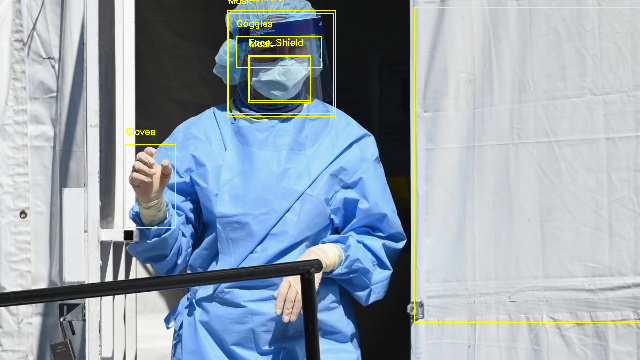

In [83]:
import torch
from PIL import Image
from google.colab.patches import cv2_imshow
model_path = '/content/yolov5/runs/train/exp3/weights/best.pt'
device = 'cuda'  # replace with 'cuda' if you have a GPU

# Load the YOLOv5 model
model = torch.hub.load('/content/yolov5', 'custom', path=model_path, source='local')

# Load the input image
#img = cv2.imread(img_path)
img = cv2.imread("/content/data/test/images/yydr.jpg")
# Run the YOLOv5 model on the input image
results = model(img)
labels = ['Gloves', 'Mask', 'Face_Shield', 'Coverall','Goggles']
# Get the detected objects and their bounding boxes
objects = results.pred[0].detach().cpu().numpy()
font_scale = .3
font_thickness = 1
font_color = (0,255 , 255)
# Draw the bounding boxes on the image
for obj in objects:
    if obj[4]>=0.1:
      print(labels[cls])
      x1, y1, x2, y2, conf, cls = [int(x) for x in obj]
      cv2.rectangle(img, (x1, y1), (x2, y2), font_color, 1)
      cv2.putText(img, labels[cls], (x1, y1 - 10), cv2.FONT_HERSHEY_SIMPLEX, font_scale, font_color, font_thickness)

# Display the image
cv2_imshow(img)

In [66]:
import zipfile
import os

def create_zip_folder(folder_path, output_path):
    """
    Creates a zip file of a folder and saves it to the specified output path.
    """
    with zipfile.ZipFile(output_path, 'w', zipfile.ZIP_DEFLATED) as zip_file:
        for root, dirs, files in os.walk(folder_path):
            for file in files:
                file_path = os.path.join(root, file)
                zip_file.write(file_path, arcname=file)

# Example usage:
folder_path = '/content/yolov5/runs/train/exp3'
output_path = '/content/yolov5_ppe.zip'
create_zip_folder(folder_path, output_path)

In [67]:
!zip -r /content/exp3.zip /content/yolov5/runs/train/exp3

  adding: content/yolov5/runs/train/exp3/ (stored 0%)
  adding: content/yolov5/runs/train/exp3/PR_curve.png (deflated 10%)
  adding: content/yolov5/runs/train/exp3/val_batch0_labels.jpg (deflated 8%)
  adding: content/yolov5/runs/train/exp3/train_batch1.jpg (deflated 14%)
  adding: content/yolov5/runs/train/exp3/val_batch2_labels.jpg (deflated 24%)
  adding: content/yolov5/runs/train/exp3/val_batch2_pred.jpg (deflated 22%)
  adding: content/yolov5/runs/train/exp3/F1_curve.png (deflated 6%)
  adding: content/yolov5/runs/train/exp3/results.png (deflated 12%)
  adding: content/yolov5/runs/train/exp3/confusion_matrix.png (deflated 23%)
  adding: content/yolov5/runs/train/exp3/labels.jpg (deflated 26%)
  adding: content/yolov5/runs/train/exp3/events.out.tfevents.1681602118.5a9948b824b7.18950.0 (deflated 28%)
  adding: content/yolov5/runs/train/exp3/results.csv (deflated 83%)
  adding: content/yolov5/runs/train/exp3/hyp.yaml (deflated 45%)
  adding: content/yolov5/runs/train/exp3/opt.yaml (d

In [70]:
from google.colab import files
files.download('/content/exp3.zip')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>